<a href="https://colab.research.google.com/github/ollcesar/projeto-inteligencia-artificial/blob/main/variasclasses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import zipfile


In [ ]:
torch.manual_seed(123)

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import zipfile

torch.manual_seed(123)

classificador = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.BatchNorm2d(num_features=32),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(32, 32, 3),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(in_features=14*14*32, out_features=128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 3),  
    nn.Softmax(dim=1) 
)


In [ ]:

criterion = nn.CrossEntropyLoss()  
optimizer = optim.Adam(classificador.parameters())


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/dataset.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
data_dir_train = '/content/dataset/training_set'
data_dir_test = '/content/dataset/test_set'

In [ ]:
transform_train = transforms.Compose(
    [
     transforms.Resize([64, 64]),
     transforms.RandomHorizontalFlip(),
     transforms.RandomAffine(degrees=7, 
                             translate=(0, 0.07), 
                             shear=0.2, 
                             scale=(1, 1.2)),
     transforms.ToTensor()
    ]
)

In [ ]:
transform_test = transforms.Compose(
    [
     transforms.Resize([64, 64]),
     transforms.ToTensor()
    ]
)



In [ ]:
train_dataset = datasets.ImageFolder(data_dir_train, transform=transform_train)
train_dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle=True)

In [ ]:
test_dataset = datasets.ImageFolder(data_dir_test, transform=transform_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle=True)

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [ ]:
classificador.to(device)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (5): ReLU()
  (6): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=6272, out_features=128, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.2, inplace=False)
  (12): Linear(in_features=128, out_features=128, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.2, inplace=False)
  (15): Linear(in_features=128, out_features=3, bias=True)
  (16): Softmax(dim=1)
)

In [ ]:
def training_loop(loader, epoch):
    running_loss = 0.
    running_accuracy = 0.
    
    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()        
        outputs = classificador(inputs)
        
        loss = criterion(outputs, labels)  # Use os rótulos diretamente na função de perda
        loss.backward()
        
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)  
        accuracy = torch.mean((predicted == labels).float())
        running_accuracy += accuracy
                   
        print('\rÉPOCA {:3d} - Loop {:3d} de {:3d}: perda {:03.2f} - precisão {:03.2f}'.format(epoch + 1, i + 1, len(loader), loss, accuracy), end='\r')
        
    print('\rÉPOCA {:3d} FINALIZADA: perda {:.5f} - precisão {:.5f}'.format(epoch + 1, running_loss/len(loader), running_accuracy/len(loader)))


In [ ]:
for epoch in range(10):
    print('TREINAMENTO DO MODELO')
    training_loop(train_loader, epoch)
    classificador.eval()
    print('VALIDAÇÃO DO MODELO')
    training_loop(test_loader, epoch)
    classificador.train()
    print('-----------------------------------------')

Treinando...
ÉPOCA   1 FINALIZADA: perda 0.81965 - precisão 0.72557
Validando...
ÉPOCA   1 FINALIZADA: perda 0.86356 - precisão 0.68517
Treinando...
ÉPOCA   2 FINALIZADA: perda 0.79806 - precisão 0.75166
Validando...
ÉPOCA   2 FINALIZADA: perda 0.91529 - precisão 0.63398
Treinando...
ÉPOCA   3 FINALIZADA: perda 0.82056 - precisão 0.72806
Validando...
ÉPOCA   3 FINALIZADA: perda 0.87641 - precisão 0.67420
Treinando...
ÉPOCA   4 FINALIZADA: perda 0.81059 - precisão 0.74036
Validando...
ÉPOCA   4 FINALIZADA: perda 0.87352 - precisão 0.67753
Treinando...
ÉPOCA   5 FINALIZADA: perda 0.81185 - precisão 0.73903
Validando...
ÉPOCA   5 FINALIZADA: perda 0.91596 - precisão 0.63514
Treinando...
ÉPOCA   6 FINALIZADA: perda 0.81596 - precisão 0.73454
Validando...
ÉPOCA   6 FINALIZADA: perda 0.88096 - precisão 0.66988
Treinando...
ÉPOCA   7 FINALIZADA: perda 0.81097 - precisão 0.73969
Validando...
ÉPOCA   7 FINALIZADA: perda 0.85063 - precisão 0.70047
Treinando...
ÉPOCA   8 FINALIZADA: perda 0.81667

In [ ]:
def classificar_imagem(fname):
  from PIL import Image
  import matplotlib.pyplot as plt
  imagem_teste = Image.open(data_dir_test + '/' + fname)
  plt.imshow(imagem_teste)

  import numpy as np
  imagem_teste = imagem_teste.resize((64, 64))
  imagem_teste = np.array(imagem_teste.getdata()).reshape(*imagem_teste.size, 3)
  imagem_teste = imagem_teste / 255
  imagem_teste = imagem_teste.transpose(2, 0, 1)
  imagem_teste = torch.tensor(imagem_teste, dtype=torch.float).view(-1, *imagem_teste.shape)


  classificador.eval()
  imagem_teste = imagem_teste.to(device)
  outputs = classificador(imagem_teste)
  _, predicted = torch.max(outputs, 1)
  output = predicted.item()

  idx_to_class = {value: key for key, value in test_dataset.class_to_idx.items()}

  return idx_to_class[output]

'LYT'

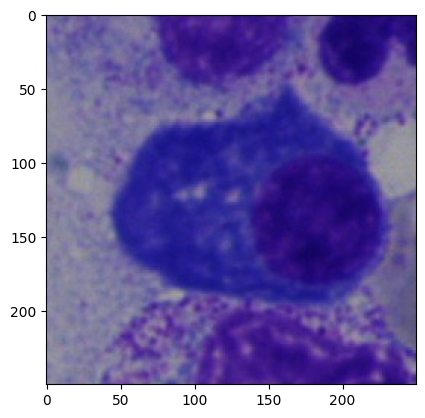

In [ ]:
imagem = '/PLM/0001-1000/PLM_00015.jpg'
classificar_imagem(imagem)